In [1]:
print("hi")

hi


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

In [4]:
traindata = datasets.FashionMNIST(root='./dir',train=True,download=True,transform=transform)
testdata = datasets.FashionMNIST(root='./dir',train=False,download=True,transform=transform)


100.0%
100.0%
100.0%
100.0%


In [5]:
train_loader = DataLoader(traindata,batch_size=128,shuffle=True,num_workers=2)
test_loader = DataLoader(testdata,batch_size=128,shuffle=False,num_workers=2)

In [6]:
class cnn_FashionMNIST(nn.Module):
    def __init__(self):
        super(cnn_FashionMNIST,self).__init__()
        self.conv1=nn.Conv2d(1,32,3,padding=1)
        self.pool1=nn.MaxPool2d(2,2)

        self.conv2=nn.Conv2d(32,64,3,padding=1)
        self.pool2=nn.MaxPool2d(2,2)

        self.fc1=nn.Linear(7*7*64,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,10)

    def forward(self,x):
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool1(x)
        
        x=self.pool2(torch.relu(self.conv2(x)))
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=torch.relu(x)
        x=self.fc2(x)
        x=torch.relu(x)
        x=self.fc3(x)
        return x


In [9]:
model = cnn_FashionMNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

for epoch in range(20):
    for image,label in train_loader:
        image,label = image.to(device),label.to(device)
        output=model(image)
        loss=criterion(output,label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"epoch:{epoch+1}, loss:{loss.item()}")
        

epoch:1, loss:0.33554157614707947
epoch:2, loss:0.3692183196544647
epoch:3, loss:0.3236941397190094
epoch:4, loss:0.24857060611248016
epoch:5, loss:0.20272473990917206
epoch:6, loss:0.17977367341518402
epoch:7, loss:0.08228107541799545
epoch:8, loss:0.11439371854066849
epoch:9, loss:0.07209283113479614
epoch:10, loss:0.11942005157470703
epoch:11, loss:0.009790605865418911
epoch:12, loss:0.0505463071167469
epoch:13, loss:0.10336077958345413
epoch:14, loss:0.03487494960427284
epoch:15, loss:0.019644761458039284
epoch:16, loss:0.005561341997236013
epoch:17, loss:0.0380498431622982
epoch:18, loss:0.004971357062458992
epoch:19, loss:0.07799722999334335
epoch:20, loss:0.00552742974832654


In [11]:
correct=0.0
total=0.0
model.eval()
with torch.no_grad():
    for image,label in test_loader:
        image,label = image.to(device),label.to(device)
        output=model(image)
        max,predicted=torch.max(output,1)
        correct+= (predicted==label).sum().item()
        total+=label.size(0)
    print(f"Test accuracy: {(correct/total)*100}")  

Test accuracy: 91.8


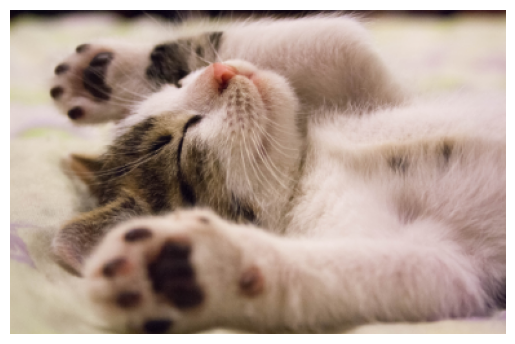

In [15]:
img = "kitten.png"
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open(img)

# Display the image
plt.imshow(image)
plt.axis('off') # Hide axis
plt.show()

In [ ]:
#plot test accuracy graph val acc VS val ans val loss vs loss to
#improve the accuracy to 95%
#give input image and predict the output class
#use any pretrain model on cifar10 dataset(resnet)


